# ARTI406 - Assignment 1: Exploratory Data Analysis (EDA)

## Real-Life Example: Used Cars Dataset
This notebook applies EDA steps from class on a real dataset of used cars.
The goal is to understand price patterns and data quality also  key factors related to car prices.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

## Load dataset

In [2]:
df = pd.read_csv('car-sales-saudia.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## 1. Data Overview

In [3]:
print('Shape (rows, columns):', df.shape)
print('\nColumn data types:')
print(df.dtypes)

Shape (rows, columns): (4345, 9)

Column data types:
Brand               str
Price           float64
Body                str
Mileage           int64
EngineV         float64
Engine Type         str
Registration        str
Year              int64
Model               str
dtype: object


In [4]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## 2. Data Cleaning and cheking

In [5]:
# Missing values
print('Missing values per column:')
print(df.isna().sum())

# Duplicate rows
print('\nNumber of duplicate rows:', df.duplicated().sum())

Missing values per column:
Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

Number of duplicate rows: 73


In [6]:
# Convert numeric columns to proper numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['EngineV'] = pd.to_numeric(df['EngineV'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows where key target variable -Price- is missing
df = df.dropna(subset=['Price'])

print('Shape after cleaning:', df.shape)
print('\nUpdated missing values:')
print(df.isna().sum())

Shape after cleaning: (4173, 9)

Updated missing values:
Brand             0
Price             0
Body              0
Mileage           0
EngineV         148
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64


## 3. Univariate Analysis
### Descriptive summary Statistics

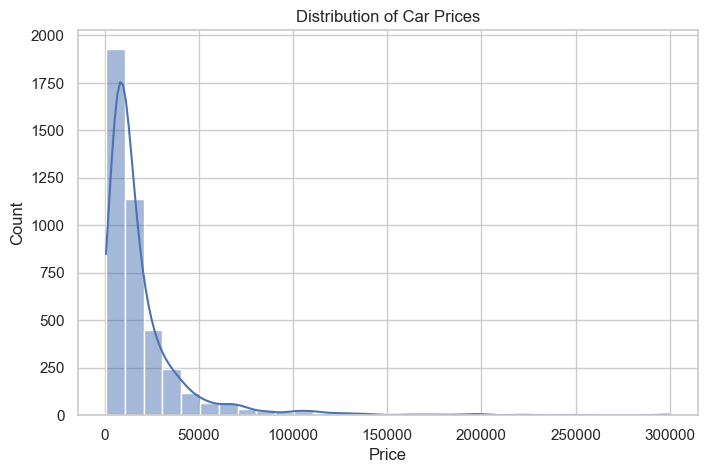

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

As we see, we can say that the Most cars are in lower-to-mid price ranges, with a few are expensive .

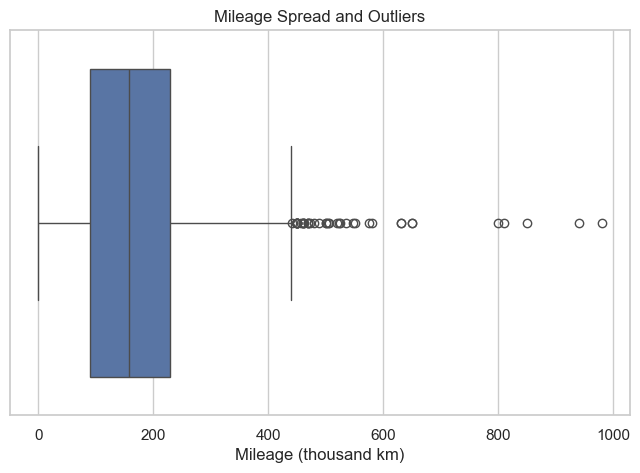

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Mileage'])
plt.title('Mileage Spread and Outliers')
plt.xlabel('Mileage (thousand km)')
plt.show()

Insight: Mileage has outliers, which is normal in real used-car markets.

## 4. Bivariate Analysis

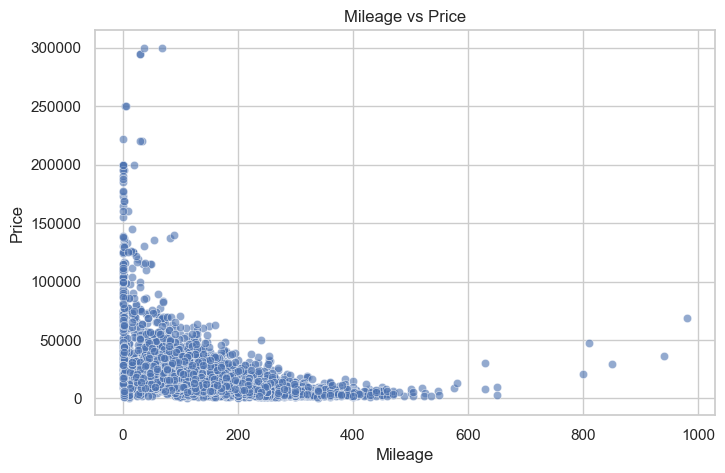

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Mileage', y='Price', alpha=0.6)
plt.title('Mileage vs Price')
plt.show()

 In general, price decreases as mileage increases, though brand/model differences create spread.

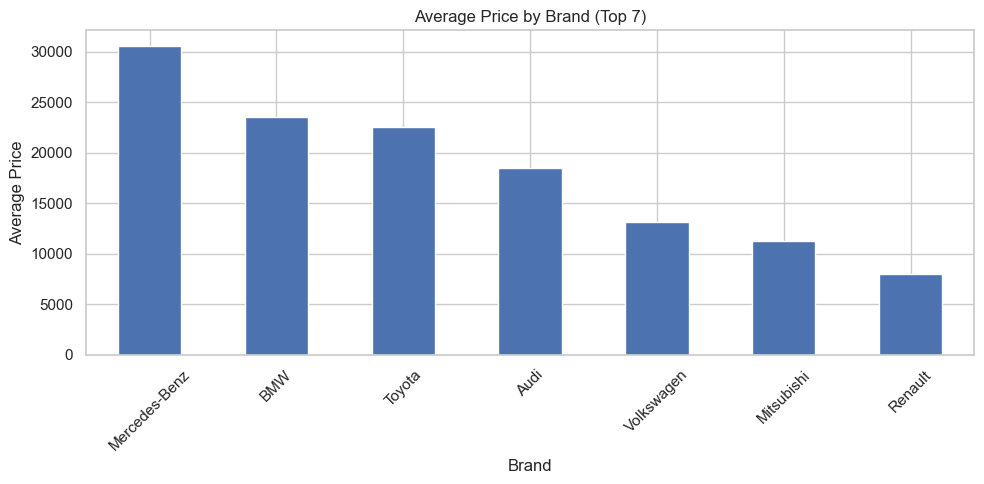

Brand
Mercedes-Benz    30608.048122
BMW              23525.368087
Toyota           22591.220287
Audi             18489.633484
Volkswagen       13125.267930
Mitsubishi       11295.713003
Renault           8035.127018
Name: Price, dtype: float64

In [10]:
avg_price_by_brand = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
avg_price_by_brand.head(7).plot(kind='bar')
plt.title('Average Price by Brand (Top 7)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

avg_price_by_brand.head(7)

Insight: luxarue brands tend to have higher average prices in this dataset.

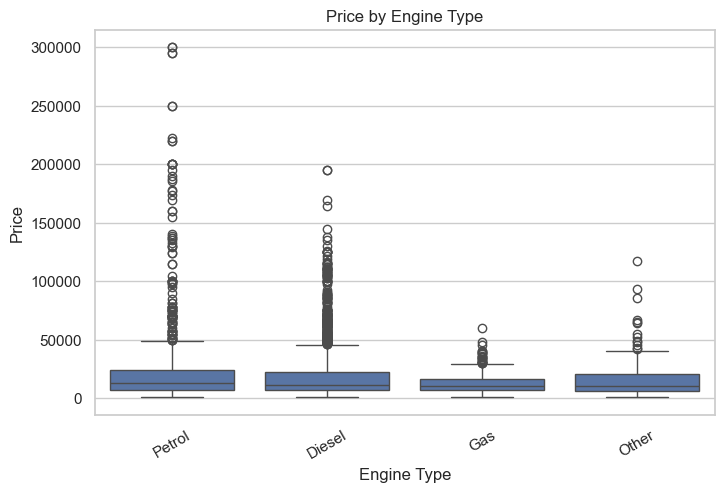

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Engine Type', y='Price')
plt.title('Price by Engine Type')
plt.xticks(rotation=30)
plt.show()

We can see that Engine type appears to influence pricing, with visible differences between fuel categories.

## 5. Correlation Analysis

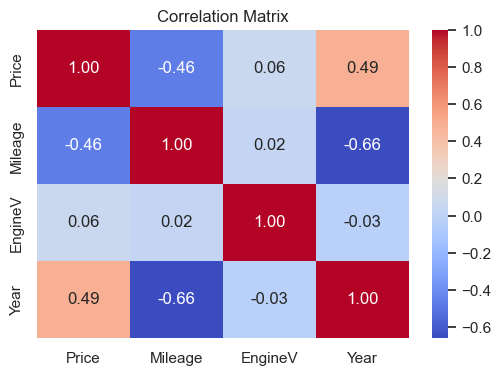

,Price,Mileage,EngineV,Year
Price,1.000000,-0.464795,0.058664,0.487031
Mileage,-0.464795,1.000000,0.024935,-0.657501
EngineV,0.058664,0.024935,1.000000,-0.030321
Year,0.487031,-0.657501,-0.030321,1.000000


In [12]:
numeric_cols = ['Price', 'Mileage', 'EngineV', 'Year']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

corr_matrix

..Year is usually positively related to price, while mileage is often negatively related...

## 6. Registration Effect

Registration
yes    21002.942831
no      4224.137056
Name: Price, dtype: float64


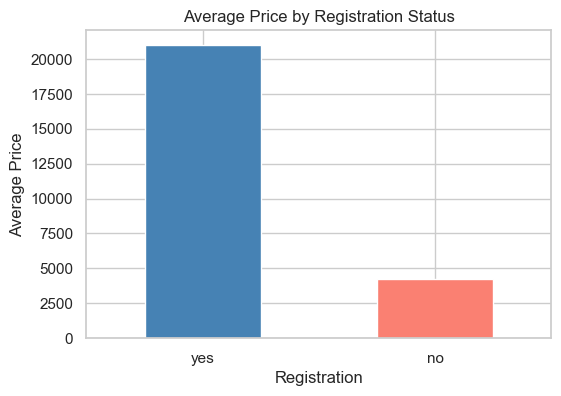

In [13]:
registration_price = df.groupby('Registration')['Price'].mean().sort_values(ascending=False)
print(registration_price)

plt.figure(figsize=(6, 4))
registration_price.plot(kind='bar', color=['steelblue', 'salmon'])
plt.title('Average Price by Registration Status')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

Insight: Registered cars tend to have higher prices because they are easier and safer to buy.

## Final Summary
1. The dataset required cleaning for non-numeric values in `Price`.
2. Car price is influenced by multiple factors such as brand, mileage, year, and registration.
3. Mileage generally decreases price, while newer cars tend to be more expensive.
4. This EDA gives a strong base for building a future price prediction model.